# NLP Technology Assignment 1


## Imports

In [1]:
# uncomment in case they are not installed yet
# required for graph visualization
#!pip install networkx
#!pip install pydot

In [2]:
#FIRST, WE IMPORT EVERYTHING WE NEED

import spacy
from spacy.symbols import nsubj, VERB
from spacy import displacy
from nltk.util import ngrams
from nltk import tokenize, word_tokenize, sent_tokenize
from nltk.lm.preprocessing import padded_everygram_pipeline
import pandas as pd
#import stanza
import textacy
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from matplotlib.pyplot import figure
import numpy as np

##  Data Loading and Exploration

In [3]:
#WE LOAD THE LANGUAGE MODEL FOR SPACY

nlp = spacy.load("en_core_web_sm")

In [4]:
#WE READ THROUGH OUR TEST FILE

with open('test.txt') as test:
    sentences = test.readlines()

In [5]:
#WE GET THE SENTENCES AND THE TOKENS FROM THE TEST FILE

for content in sentences:
    content = content.replace('-',' ') #preprocessing replacing dashes with blank spaces. Dashes are difficult for the parser to handle.
    print(content)

split_content = tokenize.sent_tokenize(content)
tokenized_content = word_tokenize(content)

A language is a structured system of communication used by humans. Languages can be based on speech and gesture (spoken language), sign, or writing. The structure of language is its grammar and the free components are its vocabulary. Many languages, including the most widely spoken ones, have writing systems that enable sounds or signs to be recorded for later reactivation. Human language is unique among the known systems of animal communication in that it is not dependent on a single mode of transmission, is highly variable between cultures and across time, and affords a much wider range of expression than other systems.


In [6]:
#WE CREATE A DATAFRAME TO DISPLAY THE FEATURES

new_df = pd.DataFrame(data = tokenized_content, columns = ['Tokens'])

## Feature Extraction

### Token based features

In [7]:
#WE GET THE TOKEN BIGRAMS, STYLE [token - 1, token] and [token, token + 1]

text = 'test.txt'

with open (text, 'r') as infile:
    text = infile.readlines()
    #print(text)
    for sentences in text:
        #print(type(sentences))
        word_tokenize(sentences)
              
        tokenized_text = [list(map(str.lower, word_tokenize(sent)))
                          for sent in sent_tokenize(sentences)]
              
ngram_data, padded = padded_everygram_pipeline(2, tokenized_text)

bigram_complete = []
for ngrams in ngram_data: 
    ngram_list = list(ngrams)
    ngram_list = [x for x in ngram_list if len(x) == 2]
    bigram_complete.append(ngram_list)
bigram_complete_l = [x[:-1] for x in bigram_complete]    
bigram_complete_r = [x[1:] for x in bigram_complete]

bigram_token_previous = []
for item in bigram_complete_l:
    #print(item) 
    for ele in item:
        #print(ele)
        bigram_token_previous.append(ele)
        
bigram_token_next = []
for item in bigram_complete_r:
    #print(item) 
    for ele in item:
        #print(ele)
        bigram_token_next.append(ele)
#print(bigram_token)

new_df['bigram token previous'] = bigram_token_previous
new_df['bigram token next'] = bigram_token_next

In [8]:
#WE GET THE TOKEN TRIGRAMS, STYLE [token - 2, token - 1, token] and [token, token + 1, token + 2] 

text = 'test.txt'
with open (text, 'r') as infile:
    text = infile.readlines()
    #print(text)
    for sentences in text:
        #print(type(sentences))
        word_tokenize(sentences)
              
        tokenized_text = [list(map(str.lower, word_tokenize(sent)))
                          for sent in sent_tokenize(sentences)]
            
ngram_data, padded = padded_everygram_pipeline(3, tokenized_text)

trigram_complete = []
for ngrams in ngram_data: 
    ngram_list = list(ngrams)
    ngram_list = [x for x in ngram_list if len(x)==3]
    trigram_complete.append(ngram_list)
trigram_complete_l = [x[:-2] for x in trigram_complete]   
trigram_complete_r = [x[2:] for x in trigram_complete]

trigram_token_previous = []
for item in trigram_complete_l:
    #print(item) 
    for ele in item:
        #print(ele)
        trigram_token_previous.append(ele)
        
trigram_token_next = []
for item in trigram_complete_r:
    #print(item) 
    for ele in item:
        #print(ele)
        trigram_token_next.append(ele)

new_df['trigram token previous'] = trigram_token_previous
new_df['trigram token next'] = trigram_token_next

### Dependency based features

In [9]:
#WE GET THE DEPENDENCY OF EACH TOKEN TO ITS HEAD/ROOT and WE ADD IT TO THE DATAFRAME

d_dep = []
for word in split_content:
    doc = nlp(word)
    dependency_list = []
    for item in doc:
        dependency_list.append(item.dep_)
    d_dep.append(dependency_list)

list_dep = []
for item in d_dep:
    for dep in item:
        list_dep.append(dep)

In [10]:
#WE GET THE DEPENDENCY BIGRAMS, STYLE [token - 1, token] and [token, token + 1]

ngram_data, padded = padded_everygram_pipeline(2, d_dep)

bigram_complete = []
for ngrams in ngram_data: 
    ngram_list = list(ngrams)
    ngram_list = [x for x in ngram_list if len(x)==2 ]
    bigram_complete.append(ngram_list)
bigram_complete_l = [x[:-1] for x in bigram_complete]    
bigram_complete_r = [x[1:] for x in bigram_complete]

bigram_dep_previous = []
for item in bigram_complete_l:
    #print(item) 
    for ele in item:
        #print(ele)
        bigram_dep_previous.append(ele)
        
bigram_dep_next = []
for item in bigram_complete_r:
    #print(item) 
    for ele in item:
        #print(ele)
        bigram_dep_next.append(ele)

new_df['Dependency'] = list_dep #store dependencies in the new_df dataframe
new_df['bigram dep previous'] = bigram_dep_previous
new_df['bigram dep next'] = bigram_dep_next

In [11]:
#WE GET THE DEPENDENCY TRIGRAMS, STYLE [token - 2, token - 1, token] and [token, token + 1, token + 2] 

ngram_data, padded = padded_everygram_pipeline(3, d_dep)

trigram_complete = []
for ngrams in ngram_data: 
    ngram_list = list(ngrams)
    ngram_list = [x for x in ngram_list if len(x) == 3]
    trigram_complete.append(ngram_list)
trigram_complete_l = [x[:-2] for x in trigram_complete]   
trigram_complete_r = [x[2:] for x in trigram_complete]

trigram_dep_previous = []
for item in trigram_complete_l:
    #print(item) 
    for ele in item:
        #print(ele)
        trigram_dep_previous.append(ele)
        
trigram_dep_next = []
for item in trigram_complete_r:
    #print(item) 
    for ele in item:
        #print(ele)
        trigram_dep_next.append(ele)

new_df['trigram dep previous'] = trigram_dep_previous
new_df['trigram dep next'] = trigram_dep_next

In [12]:
#WE GET THE DIRECT HEAD OF EACH TOKEN

d = []
for word in split_content:
    doc = nlp(word)
    dependency_list = []
    for item in doc:
        dependency_list.append(item.head)
    d.append(dependency_list)

list_parent = []
for item in d:
    #print(item)
    for parent in item:
        list_parent.append(parent)
new_df['Direct Parent'] = list_parent

### POS tag related features

In [13]:
#WE GET THE PoS TAG OF THE DIRECT HEAD OF EACH TOKEN
#This is meant to capture the phrasal structure better

d = []
for word in split_content:
    doc = nlp(word)
    dependency_list = []
    for item in doc:
        dependency_list.append(item.head.pos_)
    d.append(dependency_list)

list_parent = []
for item in d:
    #print(item)
    for parent in item:
        list_parent.append(parent)
new_df['POS Parent'] = list_parent

In [14]:
#WE GET THE PoS TAG OF EACH TOKEN ITSELF

d_pos = []
for word in split_content:
    doc = nlp(word)
    pos_list = []
    for item in doc:
        pos_list.append(item.pos_)
    d_pos.append(pos_list)

list_pos = []
for item in d_pos:
    #print(item)
    for pos in item:
        list_pos.append(pos)
new_df['POS Token'] = list_pos

In [15]:
#WE GET THE PoS TAG BIGRAMS, STYLE [token - 1, token] and [token, token + 1]

ngram_data, padded = padded_everygram_pipeline(2, d_pos)

bigram_complete = []
for ngrams in ngram_data: 
    ngram_list = list(ngrams)
    ngram_list = [x for x in ngram_list if len(x)==2 ]
    bigram_complete.append(ngram_list)
bigram_complete_l = [x[:-1] for x in bigram_complete]    
bigram_complete_r = [x[1:] for x in bigram_complete]

bigram_pos_previous = []
for item in bigram_complete_l:
    #print(item) 
    for ele in item:
        #print(ele)
        bigram_pos_previous.append(ele)
        
bigram_pos_next = []
for item in bigram_complete_r:
    #print(item) 
    for ele in item:
        #print(ele)
        bigram_pos_next.append(ele)

new_df['bigram pos previous'] = bigram_pos_previous
new_df['bigram pos next'] = bigram_pos_next

In [16]:
#WE GET THE PoS TAG TRIGRAMS, STYLE [token - 2, token - 1, token] and [token, token + 1, token + 2] 

ngram_data, padded = padded_everygram_pipeline(3, d_pos)

trigram_complete = []
for ngrams in ngram_data: 
    ngram_list = list(ngrams)
    ngram_list = [x for x in ngram_list if len(x)==3]
    trigram_complete.append(ngram_list)

trigram_complete_l = [x[:-2] for x in trigram_complete]   
trigram_complete_r = [x[2:] for x in trigram_complete]
    
trigram_pos_previous = []
for item in trigram_complete_l:
    #print(item)
    for ele in item:
        #print(ele)
        trigram_pos_previous.append(ele)
        
trigram_pos_next = []
for item in trigram_complete_r:
    #print(item) 
    for ele in item:
        #print(ele)
        trigram_pos_next.append(ele)

new_df['trigram pos previous'] = trigram_pos_previous
new_df['trigram pos next'] = trigram_pos_next

In [17]:
#WE GET THE CHILD(REN) OF EACH TOKEN, IF EXISTING 
#This is only the dependency, not the constituent

d = []
for word in split_content:
    doc = nlp(word)
    children_list = [list(t.children) for t in doc]
    #print(children_list)
    d.append(children_list)
    
list_children = []
for item in d:
    #print(item)
    for child in item:        
        list_children.append(child)
new_df['Dependents'] = list_children

In [18]:
#WE GET THE FULL CONSTITUENTS OF EACH HEAD

d = []
for word in split_content:
    doc = nlp(word)
    constituents_list = [list(t.subtree) for t in doc]
    d.append(constituents_list)

list_constituents = []
for item in d:
    #print(item)
    for constituent in item:        
        list_constituents.append(constituent)
new_df['Constituents'] = list_constituents

### Graph structure approach


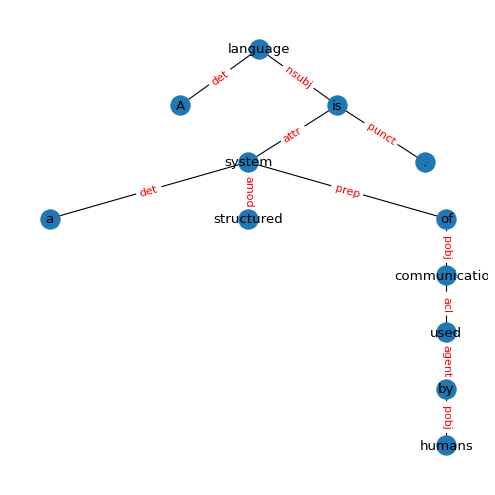

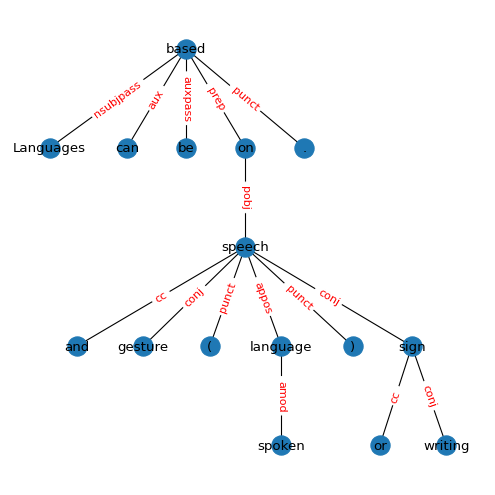

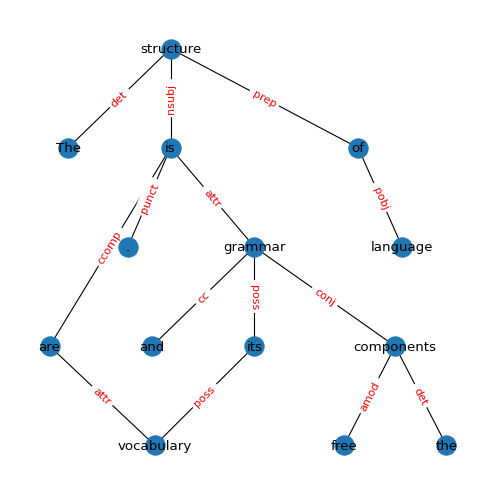

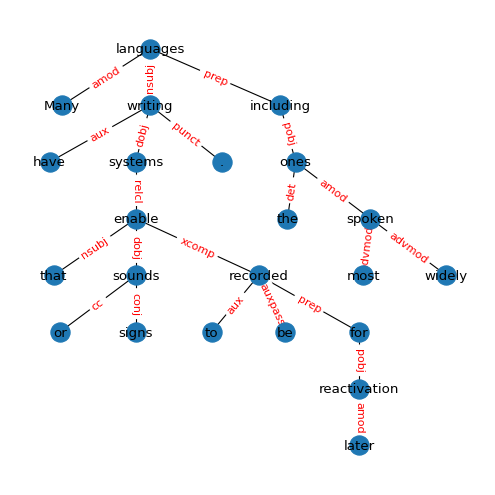

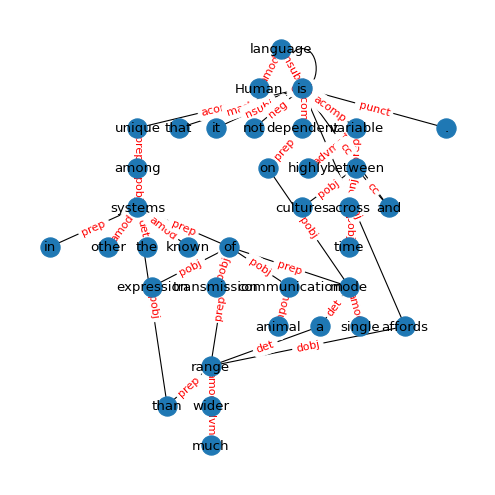

"\nNOTES:\nThe reference to the tokens within the sentence is currently only relying on the string of the token, \nwhich is why duplications of the tokens lead to a false representation in the graph.\nAlso, the first graph is depicting the wrong node ('language') as root, \nfor which we did not find a explanation\n"

In [19]:
# initialization of entire 
distance_to_root_list = []

# looping through the sentences
for sentence in split_content:
    
    # apply spacy parser
    #doc = nlp(sentence.replace(',',''))
    doc = nlp(sentence)
    
    # initializations
    edges_dict = {}
    root_of_sentence = ''

    # loop through each token  
    for token in doc:
        
        # find head of token, if it is the root of the dependency tree, pass
        if token.head == token:
            root_of_sentence = str(token)
        # since the graph is (for some reason) not working with the commatas, we omit them here
        elif str(token) != ',':
            # create the edge from the token head to the token 
            edge = (str(token.head), str(token))
            # add the dependency as edge information
            edges_dict[edge] = token.dep_
    
    
        
    # construct the tree from its edges
    tree = nx.Graph(edges_dict.keys())
    
    # loop through all tokens again to make calculations on he respective graph
    for token in doc:
        
        # ommiting kommas, since they are not in the tree
        if str(token) == ',':
            distnace = np.nan
        
        else:
            # calculate distance to root
            distance = nx.shortest_path_length(tree, source=root_of_sentence, target=str(token))
        
        
        distance_to_root_list.append(distance)
        



    # create figure
    figure(figsize=(6, 6), dpi=80)
    
    # taken from (https://stackoverflow.com/questions/57512155/how-to-draw-a-tree-more-beautifully-in-networkx)
    pos = graphviz_layout(tree, prog='dot')
    # draw tree and edges
    nx.draw(tree, pos, with_labels = True, arrows=False)
    nx.draw_networkx_edge_labels(tree, pos, edge_labels=edges_dict, font_color='red')
    
    plt.show()


new_df['Distance_to_root'] = distance_to_root_list
    
    
'''
NOTES:
The reference to the tokens within the sentence is currently only relying on the string of the token, 
which is why duplications of the tokens lead to a false representation in the graph.
Also, the first graph is depicting the wrong node ('language') as root, 
for which we did not find a explanation
'''

## Feature overview

In [20]:
#WE DISPLAY THE RESULTS IN A DATAFRAME 

display(new_df.head(30))

,Tokens,bigram token previous,bigram token next,trigram token previous,trigram token next,Dependency,bigram dep previous,bigram dep next,trigram dep previous,trigram dep next,Direct Parent,POS Parent,POS Token,bigram pos previous,bigram pos next,trigram pos previous,trigram pos next,Dependents,Constituents,Distance_to_root
0,A,"(<s>, a)","(a, language)","(<s>, <s>, a)","(a, language, is)",det,"(<s>, det)","(det, nsubj)","(<s>, <s>, det)","(det, nsubj, ROOT)",language,NOUN,DET,"(<s>, DET)","(DET, NOUN)","(<s>, <s>, DET)","(DET, NOUN, AUX)",[],[A],2
1,language,"(a, language)","(language, is)","(<s>, a, language)","(language, is, a)",nsubj,"(det, nsubj)","(nsubj, ROOT)","(<s>, det, nsubj)","(nsubj, ROOT, det)",is,AUX,NOUN,"(DET, NOUN)","(NOUN, AUX)","(<s>, DET, NOUN)","(NOUN, AUX, DET)",[A],"[A, language]",1
2,is,"(language, is)","(is, a)","(a, language, is)","(is, a, structured)",ROOT,"(nsubj, ROOT)","(ROOT, det)","(det, nsubj, ROOT)","(ROOT, det, amod)",is,AUX,AUX,"(NOUN, AUX)","(AUX, DET)","(DET, NOUN, AUX)","(AUX, DET, ADJ)","[language, system, .]","[A, language, is, a, structured, system, of, c...",0
3,a,"(is, a)","(a, structured)","(language, is, a)","(a, structured, system)",det,"(ROOT, det)","(det, amod)","(nsubj, ROOT, det)","(det, amod, attr)",system,NOUN,DET,"(AUX, DET)","(DET, ADJ)","(NOUN, AUX, DET)","(DET, ADJ, NOUN)",[],[a],2
4,structured,"(a, structured)","(structured, system)","(is, a, structured)","(structured, system, of)",amod,"(det, amod)","(amod, attr)","(ROOT, det, amod)","(amod, attr, prep)",system,NOUN,ADJ,"(DET, ADJ)","(ADJ, NOUN)","(AUX, DET, ADJ)","(ADJ, NOUN, ADP)",[],[structured],2
5,system,"(structured, system)","(system, of)","(a, structured, system)","(system, of, communication)",attr,"(amod, attr)","(attr, prep)","(det, amod, attr)","(attr, prep, pobj)",is,AUX,NOUN,"(ADJ, NOUN)","(NOUN, ADP)","(DET, ADJ, NOUN)","(NOUN, ADP, NOUN)","[a, structured, of]","[a, structured, system, of, communication, use...",1
6,of,"(system, of)","(of, communication)","(structured, system, of)","(of, communication, used)",prep,"(attr, prep)","(prep, pobj)","(amod, attr, prep)","(prep, pobj, acl)",system,NOUN,ADP,"(NOUN, ADP)","(ADP, NOUN)","(ADJ, NOUN, ADP)","(ADP, NOUN, VERB)",[communication],"[of, communication, used, by, humans]",2
7,communication,"(of, communication)","(communication, used)","(system, of, communication)","(communication, used, by)",pobj,"(prep, pobj)","(pobj, acl)","(attr, prep, pobj)","(pobj, acl, agent)",of,ADP,NOUN,"(ADP, NOUN)","(NOUN, VERB)","(NOUN, ADP, NOUN)","(NOUN, VERB, ADP)",[used],"[communication, used, by, humans]",3
8,used,"(communication, used)","(used, by)","(of, communication, used)","(used, by, humans)",acl,"(pobj, acl)","(acl, agent)","(prep, pobj, acl)","(acl, agent, pobj)",communication,NOUN,VERB,"(NOUN, VERB)","(VERB, ADP)","(ADP, NOUN, VERB)","(VERB, ADP, NOUN)",[by],"[used, by, humans]",4
9,by,"(used, by)","(by, humans)","(communication, used, by)","(by, humans, .)",agent,"(acl, agent)","(agent, pobj)","(pobj, acl, agent)","(agent, pobj, punct)",used,VERB,ADP,"(VERB, ADP)","(ADP, NOUN)","(NOUN, VERB, ADP)","(ADP, NOUN, PUNCT)",[humans],"[by, humans]",5


In [21]:
#WE CONVERT THE PANDAS DATAFRAME TO A CONLL FILE

#outputfile = "test_dependency.conll"
#new_df.to_csv(f'{outputfile}', sep = '\t', header = True, quotechar = '|', index = False)